# 条件随机场（CRF）

定义：CRF是给定一组输入随机变量条件下另一组输出随机变量的条件概率分布模型，其特点是假设输出随机变量构成马尔可夫随机场。

3个基本问题：概率计算问题、学习问题、预测问题

## 马尔可夫过程

定义：假设一个随机过程中，$t_n$时刻的状态$x_n$的条件发布，只与其前一状态$x_{n-1}$相关，即：

$$
P(x_n | x_1,x_2,...,x_{n-1}) = P(x_n|x_{n-1})
$$

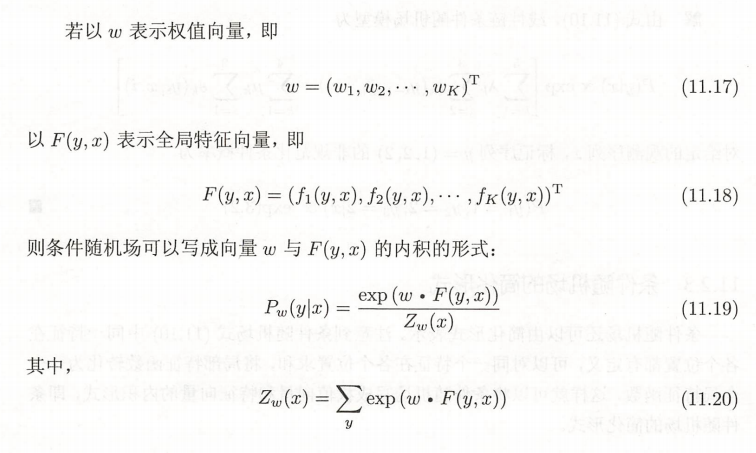

## 隐马尔科夫算法

定义：隐马尔科夫算法是对含有未知参数（隐状态）的马尔可夫链进行建模的生成模型

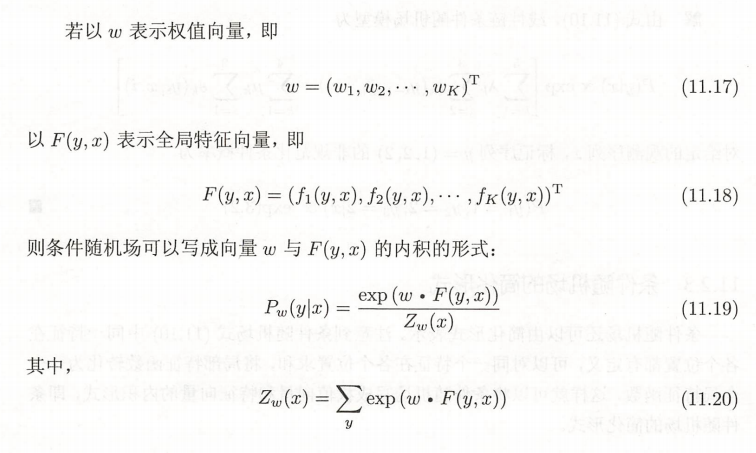

$x_i$是隐状态，$y_i$是观察状态，隐状态到对应的观察状态$y_i$间存在输出概率。

### 假设

1. 假设隐状态$x_i$ 的状态满足马尔可夫过程，i时刻的状态$x_i$ 的条件分布，仅与其前一个状态$x_{i-1}$相关，即：

$$
    P(x_i|x_1,x_2,...,x_{i-1}) = P(x_i|x_{i-1})
$$

2. 假设观测序列中各个状态仅取决于它所对应的隐状态，即：

$$
    P(y_i|x_1,x_2,...,x_{i-1},y_1,y_2,...,y_{i-1},y_{i+1},...) = P(y_i|x_{i})
$$

### 存在问题

在序列标注问题中，隐状态（标注）不仅和单个观测状态相关，还和观察序列的长度、上下文等信息相关。例如词性标注问题中，一个词被标注为动词还是名词，不仅与它本身以及它前一个词的标注有关，还依赖于上下文中的其他词。

## 条件随机场（线性链条件随机场）

### 一般条件随机场定义

设 X 与 Y 是随机变量，P(Y|X)是在给定X的条件下Y的条件概率分布。若随机变量Y构成一个由无向图G=(V,E)表示的马尔可夫随机场，即
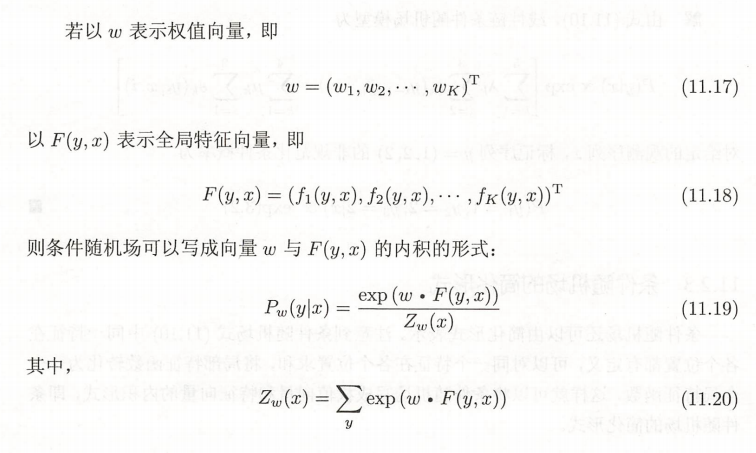
对任意结点$\upsilon$成立，则称条件概率分布P(Y|X)为条件随机场。

### 线性链条件随机场

给定 $X=(x_1,x_2,...,x_n)$ ，$Y=(y_1,y_2,...,y_n)$ 均为线性链表示的随机变量序列，若在给随机变量序列 X 的条件下，随机变量序列 Y 的条件概率分布 $P(Y|X)$ 构成条件随机场，即满足马尔可夫性：
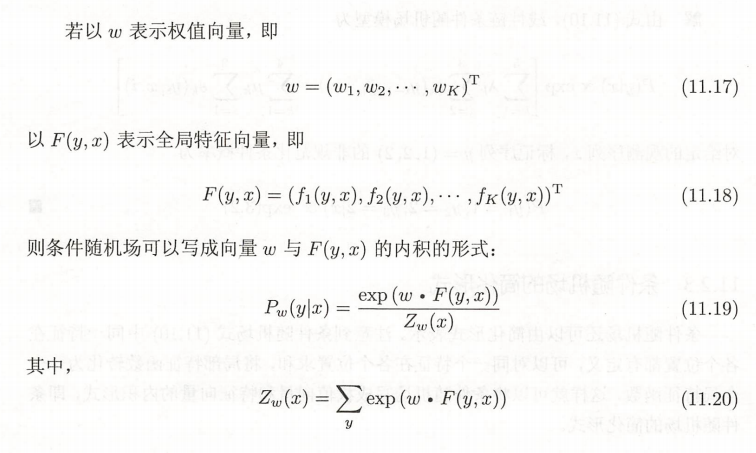
则称为 P(Y|X) 为线性链条件随机场。

### 参数化形式

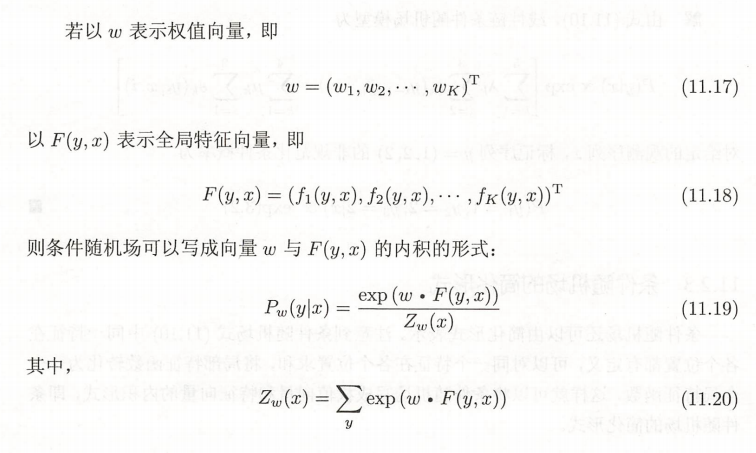

### 简化形式

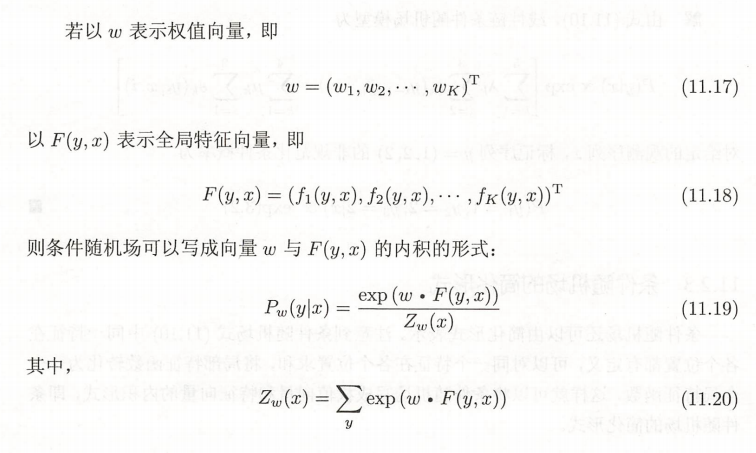
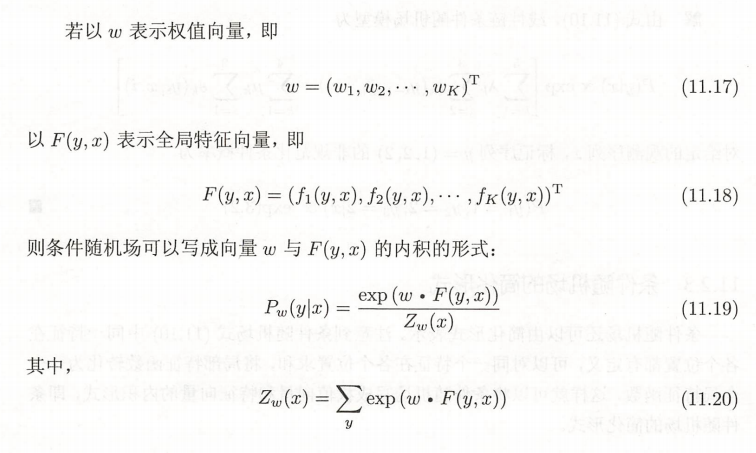



条件随机场包含概率计算问题、学习问题和预测问题三个问题。

> 1. 概率计算问题：已知模型的所有参数，计算观测序列 $Y$ 出现的概率，常用方法：前向和后向算法；

> 2. 学习问题：已知观测序列 $Y$，求解使得该观测序列概率最大的模型参数，包括隐状态序列、隐状态间的转移概率分布和从隐状态到观测状态的概率分布，常用方法：Baum-Wehch 算法；

> 3. 预测问题：一直模型所有参数和观测序列 $Y$ ，计算最可能的隐状态序列 $X$,常用算法：维特比算法。

In [1]:
import numpy as np
 
class CRF(object):
    '''实现条件随机场预测问题的维特比算法
    '''
    def __init__(self, V, VW, E, EW):
        '''
        :param V:是定义在节点上的特征函数，称为状态特征
        :param VW:是V对应的权值
        :param E:是定义在边上的特征函数，称为转移特征
        :param EW:是E对应的权值
        '''
        self.V  = V  #点分布表
        self.VW = VW #点权值表
        self.E  = E  #边分布表
        self.EW = EW #边权值表
        self.D  = [] #Delta表，最大非规范化概率的局部状态路径概率
        self.P  = [] #Psi表，当前状态和最优前导状态的索引表s
        self.BP = [] #BestPath，最优路径
        return 
        
    def Viterbi(self):
        '''
        条件随机场预测问题的维特比算法，此算法一定要结合CRF参数化形式对应的状态路径图来理解，更容易理解.
        '''
        self.D = np.full(shape=(np.shape(self.V)), fill_value=.0)
        self.P = np.full(shape=(np.shape(self.V)), fill_value=.0)
        for i in range(np.shape(self.V)[0]):
            #初始化
            if 0 == i:
                self.D[i] = np.multiply(self.V[i], self.VW[i])
                self.P[i] = np.array([0, 0])
                print('self.V[%d]='%i, self.V[i], 'self.VW[%d]='%i, self.VW[i], 'self.D[%d]='%i, self.D[i])
                print('self.P:', self.P)
                pass
            #递推求解布局最优状态路径
            else:
                for y in range(np.shape(self.V)[1]): #delta[i][y=1,2...]
                    for l in range(np.shape(self.V)[1]): #V[i-1][l=1,2...]
                        delta = 0.0
                        delta += self.D[i-1, l]                      #前导状态的最优状态路径的概率
                        delta += self.E[i-1][l,y]*self.EW[i-1][l,y]  #前导状态到当前状体的转移概率
                        delta += self.V[i,y]*self.VW[i,y]            #当前状态的概率
                        print('(x%d,y=%d)-->(x%d,y=%d):%.2f + %.2f + %.2f='%(i-1, l, i, y, \
                              self.D[i-1, l], \
                              self.E[i-1][l,y]*self.EW[i-1][l,y], \
                              self.V[i,y]*self.VW[i,y]), delta)
                        if 0 == l or delta > self.D[i, y]:
                            self.D[i, y] = delta
                            self.P[i, y] = l
                    print('self.D[x%d,y=%d]=%.2f\n'%(i, y, self.D[i,y]))
        print('self.Delta:\n', self.D)
        print('self.Psi:\n', self.P)
        
        #返回，得到所有的最优前导状态
        N = np.shape(self.V)[0]
        self.BP = np.full(shape=(N,), fill_value=0.0)
        t_range = -1 * np.array(sorted(-1*np.arange(N)))
        for t in t_range:
            if N-1 == t:#得到最优状态
                self.BP[t] = np.argmax(self.D[-1])
            else: #得到最优前导状态
                self.BP[t] = self.P[t+1, int(self.BP[t+1])]
        
        #最优状态路径表现在存储的是状态的下标，我们执行存储值+1转换成示例中的状态值
        #也可以不用转换，只要你能理解，self.BP中存储的0是状态1就可以~~~~
        self.BP += 1
        
        print('最优状态路径为：', self.BP)
        return self.BP
        
def CRF_manual():   
    S = np.array([[1,1],   #X1:S(Y1=1), S(Y1=2)
                  [1,1],   #X2:S(Y2=1), S(Y2=2)
                  [1,1]])  #X3:S(Y3=1), S(Y3=1)
    SW = np.array([[1.0, 0.5], #X1:SW(Y1=1), SW(Y1=2)
                   [0.8, 0.5], #X2:SW(Y2=1), SW(Y2=2)
                   [0.8, 0.5]])#X3:SW(Y3=1), SW(Y3=1)
    E = np.array([[[1, 1],  #Edge:Y1=1--->(Y2=1, Y2=2)
                   [1, 0]], #Edge:Y1=2--->(Y2=1, Y2=2)
                  [[0, 1],  #Edge:Y2=1--->(Y3=1, Y3=2) 
                   [1, 1]]])#Edge:Y2=2--->(Y3=1, Y3=2)
    EW= np.array([[[0.6, 1],  #EdgeW:Y1=1--->(Y2=1, Y2=2)
                   [1, 0.0]], #EdgeW:Y1=2--->(Y2=1, Y2=2)
                  [[0.0, 1],  #EdgeW:Y2=1--->(Y3=1, Y3=2)
                   [1, 0.2]]])#EdgeW:Y2=2--->(Y3=1, Y3=2)
    
    crf = CRF(S, SW, E, EW)
    ret = crf.Viterbi()
    print('最优状态路径为:', ret)
    return
    
if __name__=='__main__':
    CRF_manual()


self.V[0]= [1 1] self.VW[0]= [1.  0.5] self.D[0]= [1.  0.5]
self.P: [[0. 0.]
 [0. 0.]
 [0. 0.]]
(x0,y=0)-->(x1,y=0):1.00 + 0.60 + 0.80= 2.4000000000000004
(x0,y=1)-->(x1,y=0):0.50 + 1.00 + 0.80= 2.3
self.D[x1,y=0]=2.40

(x0,y=0)-->(x1,y=1):1.00 + 1.00 + 0.50= 2.5
(x0,y=1)-->(x1,y=1):0.50 + 0.00 + 0.50= 1.0
self.D[x1,y=1]=2.50

(x1,y=0)-->(x2,y=0):2.40 + 0.00 + 0.80= 3.2
(x1,y=1)-->(x2,y=0):2.50 + 1.00 + 0.80= 4.3
self.D[x2,y=0]=4.30

(x1,y=0)-->(x2,y=1):2.40 + 1.00 + 0.50= 3.9000000000000004
(x1,y=1)-->(x2,y=1):2.50 + 0.20 + 0.50= 3.2
self.D[x2,y=1]=3.90

self.Delta:
 [[1.  0.5]
 [2.4 2.5]
 [4.3 3.9]]
self.Psi:
 [[0. 0.]
 [0. 0.]
 [1. 0.]]
最优状态路径为： [1. 2. 1.]
最优状态路径为: [1. 2. 1.]
